<a href="https://colab.research.google.com/github/Kovibordy/ML-2.0/blob/main/Lab_3.3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas seaborn scikit-learn

# Домашнее задание 3

1. Выбрать номинальное значение как целевую переменную
2. Провести разведочный анализ **включая** анализ зависимости между номинальными переменными (chi2)
3. Выбрать `best_features`
4. Сделать нормализацию данных (scaler, onehotencoding)
4. Обучить модель логистической регрессии
5. Вывести метрики качества, описать полученный результат (также вывести коэфициенты модели)

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix
)
import numpy as np

In [ ]:
df = pd.read_csv("/content/Sleep_health_and_lifestyle_dataset.csv")

In [ ]:
df['BMI Category'] = df['BMI Category'].replace({'Normal Weight': 'Normal'})

In [ ]:
df

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


## Задание 1

In [ ]:
target_col = 'Sleep Disorder'

In [ ]:
df_clean = df.dropna(subset=[target_col]).copy()
print(f"\nДатасет после удаления строк с пропущенными значениями в '{target_col}': {df_clean.shape}")

y = df_clean[target_col]
print(f"\nРаспределение целевой переменной '{target_col}':")
print(y.value_counts())


Датасет после удаления строк с пропущенными значениями в 'Sleep Disorder': (155, 13)

Распределение целевой переменной 'Sleep Disorder':
Sleep Disorder
Sleep Apnea    78
Insomnia       77
Name: count, dtype: int64


## Задание 2

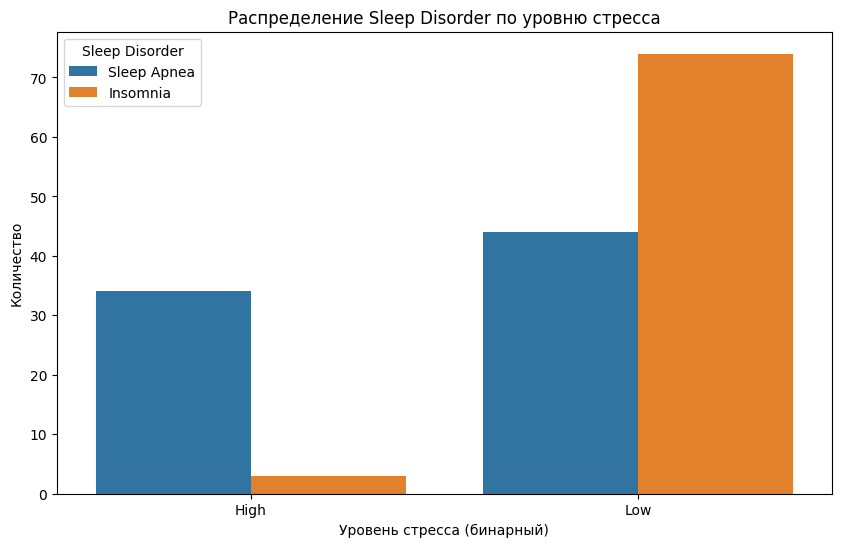

In [ ]:
df_clean['Stress_Level_Bin'] = df_clean['Stress Level'].apply(
    lambda x: 'High' if x > df_clean['Stress Level'].median() else 'Low'
)

plt.figure(figsize=(10, 6))
sns.countplot(data=df_clean, x='Stress_Level_Bin', hue=target_col)
plt.title(f'Распределение {target_col} по уровню стресса')
plt.xlabel('Уровень стресса (бинарный)')
plt.ylabel('Количество')
plt.legend(title=target_col)
plt.show()

In [ ]:
contingency_table_stress = pd.crosstab(df_clean[target_col], df_clean['Stress_Level_Bin'])
print(f"\nТаблица сопряженности для {target_col} и Stress_Level_Bin:")
print(contingency_table_stress)

chi2_stress, p_stress, dof_stress, expected_stress = chi2_contingency(contingency_table_stress)
print(f"\nТест хи-квадрат для {target_col} и Stress_Level_Bin:")
print(f"  Chi2-statistic: {chi2_stress:.2f}")
print(f"  p-value: {p_stress:.6f}")
if p_stress < 0.05:
    print("  -> Связь между переменными статистически значима (p < 0.05).")
else:
    print("  -> Связь между переменными статистически не значима (p >= 0.05).")


Таблица сопряженности для Sleep Disorder и Stress_Level_Bin:
Stress_Level_Bin  High  Low
Sleep Disorder             
Insomnia             3   74
Sleep Apnea         34   44

Тест хи-квадрат для Sleep Disorder и Stress_Level_Bin:
  Chi2-statistic: 31.45
  p-value: 0.000000
  -> Связь между переменными статистически значима (p < 0.05).


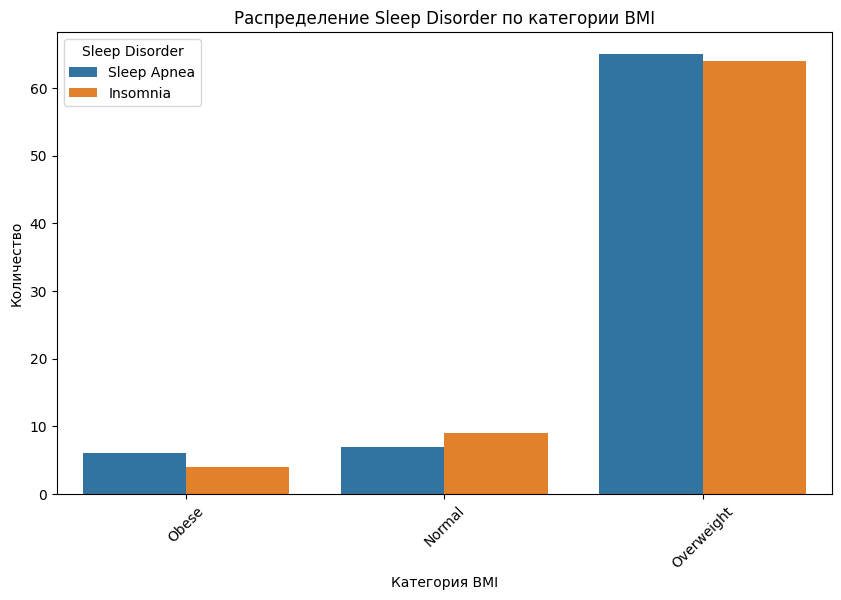

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_clean, x='BMI Category', hue=target_col)
plt.title(f'Распределение {target_col} по категории BMI')
plt.xlabel('Категория BMI')
plt.ylabel('Количество')
plt.legend(title=target_col)
plt.xticks(rotation=45)
plt.show()

In [ ]:
contingency_table_bmi = pd.crosstab(df_clean[target_col], df_clean['BMI Category'])
print(f"\nТаблица сопряженности для {target_col} и BMI_Category:")
print(contingency_table_bmi)

chi2_bmi, p_bmi, dof_bmi, expected_bmi = chi2_contingency(contingency_table_bmi)
print(f"\nТест хи-квадрат для {target_col} и BMI_Category:")
print(f"  Chi2-statistic: {chi2_bmi:.2f}")
print(f"  p-value: {p_bmi:.6f}")
if p_bmi < 0.05:
    print("  -> Связь между переменными статистически значима (p < 0.05).")
else:
    print("  -> Связь между переменными статистически не значима (p >= 0.05).")



Таблица сопряженности для Sleep Disorder и BMI_Category:
BMI Category    Normal  Obese  Overweight
Sleep Disorder                           
Insomnia             9      4          64
Sleep Apnea          7      6          65

Тест хи-квадрат для Sleep Disorder и BMI_Category:
  Chi2-statistic: 0.65
  p-value: 0.722048
  -> Связь между переменными статистически не значима (p >= 0.05).


## Задание 3

In [ ]:
numerical_features = [
    'Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level',
    'Stress Level', 'Heart Rate', 'Daily Steps'
]
categorical_features_to_use = ['Gender', 'Occupation', 'BMI Category', 'Blood Pressure']

In [ ]:
best_features_num = numerical_features
best_features_cat = categorical_features_to_use
best_features_all = best_features_num + best_features_cat

print(f"\n Выбранные числовые признаки (X): {len(best_features_num)}")
print(best_features_num)
print(f"\n Выбранные категориальные признаки (X): {len(best_features_cat)}")
print(best_features_cat)

X_initial = df_clean[best_features_all].copy()


 Выбранные числовые признаки (X): 7
['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps']

 Выбранные категориальные признаки (X): 4
['Gender', 'Occupation', 'BMI Category', 'Blood Pressure']


## 4. Сделать нормализацию данных (scaler, onehotencoding)

In [ ]:
X_processed = X_initial.copy()

# OneHotEncoder для всех категориальных признаков
if best_features_cat:
    # Создаём OneHotEncoder, drop='first' помогает избежать мультиколлинеарности
    ohe = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')
    encoded_cat_array = ohe.fit_transform(X_processed[best_features_cat])
    # Получаем имена новых закодированных колонок
    encoded_cat_feature_names = ohe.get_feature_names_out(best_features_cat)
    # Создаём DataFrame с закодированными признаками
    encoded_cat_df = pd.DataFrame(encoded_cat_array, columns=encoded_cat_feature_names, index=X_processed.index)

    # Удаляем старые категориальные колонки из X_processed
    X_processed = X_processed.drop(columns=best_features_cat)
    # Объединяем X_processed с новыми закодированными колонками
    X_processed = pd.concat([X_processed, encoded_cat_df], axis=1)

print(f"Форма X после OneHot Encoding категориальных: {X_processed.shape}")

Форма X после OneHot Encoding категориальных: (155, 32)


In [ ]:
# Нормализация числовых признаков
scaler = MinMaxScaler()
X_scaled = X_processed.copy()
# После OneHotEncoding числовые колонки - это те, что были изначально
X_scaled[best_features_num] = scaler.fit_transform(X_processed[best_features_num])

X = X_scaled
print(f"Форма X после нормализации числовых: {X.shape}")
print("\nПервые строки обработанного X:")
print(X.head())


Форма X после нормализации числовых: (155, 32)

Первые строки обработанного X:
         Age  Sleep Duration  Quality of Sleep  Physical Activity Level  \
3   0.000000            0.04               0.0                 0.000000   
4   0.000000            0.04               0.0                 0.000000   
5   0.000000            0.04               0.0                 0.000000   
6   0.032258            0.20               0.4                 0.166667   
16  0.032258            0.28               0.2                 0.166667   

    Stress Level  Heart Rate  Daily Steps  Gender_Male  Occupation_Doctor  \
3            1.0    0.952381     0.000000          1.0                0.0   
4            1.0    0.952381     0.000000          1.0                0.0   
5            1.0    0.952381     0.000000          1.0                0.0   
6            0.8    0.809524     0.071429          1.0                0.0   
16           0.8    0.714286     0.142857          0.0                0.0   

    Occ

## 5. Обучение модели логистической регрессии

In [ ]:
print("\n Обучение модели логистической регрессии")

# Разделение данных
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Объявление и обучение модели
model = LogisticRegression(
    penalty=None,  # Убираем регуляризацию для простоты, как в примере
    random_state=42,
    max_iter=1000 # Увеличиваем итерации на случай, если не сойдётся
)
model.fit(X_train, y_train)


 Обучение модели логистической регрессии


LogisticRegression(max_iter=1000, penalty=None, random_state=42)

## 6. Вывод метрики качества, описать полученный результат (также вывести коэффициенты модели)

In [ ]:
# Предсказания
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
y_train_proba = model.predict_proba(X_train)
y_test_proba = model.predict_proba(X_test)

# Функция оценки из практики/примера
def evaluate_classification(y_true, y_pred, y_proba=None):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, average='weighted', zero_division=0)
    rec = recall_score(y_true, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_true, y_pred, average='weighted', zero_division=0)

    roc_auc = None
    if y_proba is not None:
        # Мультиклассовая ROC-AUC
        classes = np.unique(y_true)
        y_true_onehot = np.eye(len(classes))[np.searchsorted(classes, y_true)]
        roc_auc = roc_auc_score(y_true_onehot, y_proba, multi_class='ovr')

    cm = confusion_matrix(y_true, y_pred)

    print(" Метрики классификации ")
    print(f"Accuracy:  {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall:    {rec:.4f}")
    print(f"F1-score:  {f1:.4f}")
    if roc_auc is not None:
        print(f"ROC-AUC:   {roc_auc:.4f}")
    print("\nConfusion Matrix:")
    print(cm)
    return {
        "accuracy": acc,
        "precision": prec,
        "recall": rec,
        "f1": f1,
        "roc_auc": roc_auc,
        "confusion_matrix": cm
    }

print("\n Метрики на обучающей выборке ")
train_metrics = evaluate_classification(y_train, y_train_pred, y_train_proba)

print("\n Метрики на тестовой выборке ")
test_metrics = evaluate_classification(y_test, y_test_pred, y_test_proba)


 Метрики на обучающей выборке 
 Метрики классификации 
Accuracy:  0.9815
Precision: 0.9821
Recall:    0.9815
F1-score:  0.9815
ROC-AUC:   0.9991

Confusion Matrix:
[[54  0]
 [ 2 52]]

 Метрики на тестовой выборке 
 Метрики классификации 
Accuracy:  0.8936
Precision: 0.8942
Recall:    0.8936
F1-score:  0.8935
ROC-AUC:   0.8827

Confusion Matrix:
[[20  3]
 [ 2 22]]


In [ ]:
# --- Вывод коэффициентов модели ---
print("\n Коэффициенты модели ")
feature_names = X.columns.tolist()
# model.coef_ для бинарной задачи имеет форму (1, n_features)
coefficients = model.coef_

print(f"Количество классов: 2 (бинарная классификация)")
print(f"Количество признаков: {len(feature_names)}")
print(f"Форма коэффициентов: {coefficients.shape}")


 Коэффициенты модели 
Количество классов: 2 (бинарная классификация)
Количество признаков: 32
Форма коэффициентов: (1, 32)


In [ ]:
print(f"\nКоэффициенты (и их противоположные значения), определяющие границу между '{model.classes_[0]}' и '{model.classes_[1]}':")

# Создаем DataFrame для наглядности
coeff_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient_for_' + str(model.classes_[0]): coefficients[0], # Коэффициенты для класса 0 ('Insomnia')
    'Coefficient_for_' + str(model.classes_[1]): -coefficients[0]  # Противоположные значения для класса 1 ('Sleep Apnea')
}).sort_values(by='Coefficient_for_' + str(model.classes_[0]), key=abs, ascending=False)

print(coeff_df)

# --- Описание результата ---
print("\n Описание результата ")


Коэффициенты (и их противоположные значения), определяющие границу между 'Insomnia' и 'Sleep Apnea':
                            Feature  Coefficient_for_Insomnia  \
30            Blood Pressure_140/95                423.149061   
23            Blood Pressure_130/86               -401.455165   
16               Occupation_Teacher                340.586215   
19            Blood Pressure_120/80                323.574353   
31            Blood Pressure_142/92               -282.384614   
27            Blood Pressure_135/90               -276.533240   
12  Occupation_Sales Representative                267.208316   
0                               Age               -254.761638   
15     Occupation_Software Engineer               -227.146558   
28            Blood Pressure_139/91                213.921945   
11                 Occupation_Nurse                208.329738   
6                       Daily Steps                207.009590   
22            Blood Pressure_130/85                17